In [1]:
# Dependencies and Setup
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Create file path
file_path = 'C:\\Users\\Adrian Bayemi\\Desktop\\1970-2021_DISASTERS.xlsx - emdat data.csv'

# Read the CSV file into a pandas DataFrame
Disasters_df = pd.read_csv(file_path)

# Display the first few rows of the DataFrame
Disasters_df.head()

,Dis No,Year,Seq,Glide,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subtype,Disaster Subsubtype,Event Name,...,No Homeless,Total Affected,Reconstruction Costs ('000 US$),Insured Damages ('000 US$),Total Damages ('000 US$),CPI,Adm Level,Admin1 Code,Admin2 Code,Geo Locations
0,1970-0013-ARG,1970,13,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,25000.0,15.001282,NaN,NaN,NaN,NaN
1,1970-0109-AUS,1970,109,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,Ada,...,NaN,NaN,NaN,NaN,72475.0,15.001282,NaN,NaN,NaN,NaN
2,1970-0044-BEN,1970,44,NaN,Natural,Hydrological,Flood,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,200.0,15.001282,NaN,NaN,NaN,NaN
3,1970-0063-BGD,1970,63,NaN,Natural,Meteorological,Storm,Tropical cyclone,NaN,NaN,...,NaN,3648000.0,NaN,NaN,86400.0,15.001282,NaN,NaN,NaN,NaN
4,1970-0026-BGD,1970,26,NaN,Natural,Meteorological,Storm,NaN,NaN,NaN,...,NaN,110.0,NaN,NaN,NaN,15.001282,NaN,NaN,NaN,NaN


In [19]:
# Row count of all the columns
Disasters_df.count()

Dis No                             14644
Year                               14644
Seq                                14644
Glide                               1581
Disaster Group                     14644
Disaster Subgroup                  14644
Disaster Type                      14644
Disaster Subtype                   11897
Disaster Subsubtype                 1044
Event Name                          3645
Country                            14644
ISO                                14644
Region                             14644
Continent                          14644
Location                           13298
Origin                              3780
Associated Dis                      3232
Associated Dis2                      698
OFDA Response                       1450
Appeal                              2440
Declaration                         3127
Aid Contribution                     677
Dis Mag Value                       4569
Dis Mag Scale                      13571
Latitude        

<Axes: >

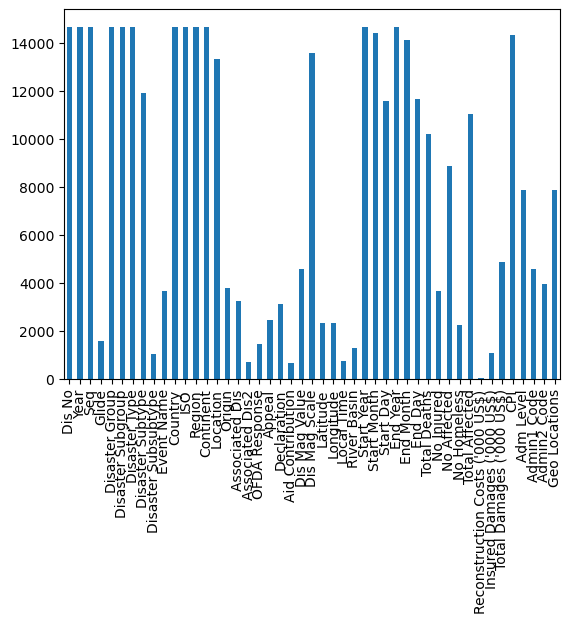

In [18]:
# Bar chart of rows in each column
Disasters_df.count().plot.bar()

In [3]:
# Displaying specific columns
desired_columns = ['Year', 'Continent', 'Region','Country','Disaster Group','Disaster Subgroup','Disaster Type','Disaster Subsubtype','Total Deaths','No Injured','No Affected','No Homeless','Total Affected','Total Damages (\'000 US$)','CPI']  
specific_df = Disasters_df[desired_columns]

# Displaying the first few rows of the DataFrame with specific columns
specific_df

,Year,Continent,Region,Country,Disaster Group,Disaster Subgroup,Disaster Type,Disaster Subsubtype,Total Deaths,No Injured,No Affected,No Homeless,Total Affected,Total Damages ('000 US$),CPI
0,1970,Americas,South America,Argentina,Natural,Hydrological,Flood,NaN,36.0,NaN,NaN,NaN,NaN,25000.0,15.001282
1,1970,Oceania,Australia and New Zealand,Australia,Natural,Meteorological,Storm,NaN,13.0,NaN,NaN,NaN,NaN,72475.0,15.001282
2,1970,Africa,Western Africa,Benin,Natural,Hydrological,Flood,NaN,NaN,NaN,NaN,NaN,NaN,200.0,15.001282
3,1970,Asia,Southern Asia,Bangladesh,Natural,Meteorological,Storm,NaN,300000.0,NaN,3648000.0,NaN,3648000.0,86400.0,15.001282
4,1970,Asia,Southern Asia,Bangladesh,Natural,Meteorological,Storm,NaN,17.0,NaN,110.0,NaN,110.0,NaN,15.001282
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14639,2021,Asia,Western Asia,Yemen,Natural,Hydrological,Flood,NaN,11.0,NaN,67980.0,NaN,67980.0,NaN,NaN
14640,2021,Africa,Southern Africa,South Africa,Natural,Hydrological,Flood,NaN,31.0,NaN,400.0,NaN,400.0,75000.0,NaN
14641,2021,Africa,Middle Africa,Congo (the Democratic Republic of the),Natural,Biological,Epidemic,NaN,131.0,301.0,NaN,NaN,301.0,NaN,NaN
14642,2021,Europe,Southern Europe,Serbia,Natural,Hydrological,Flood,NaN,NaN,NaN,22.0,NaN,22.0,NaN,NaN


In [5]:
# Set a custom formatting function to display float values without scientific notation
pd.options.display.float_format = '{:.2f}'.format

# Group by year and calculate the average the total affected, total damages ('000 US$), total deaths, and CPI 
average_data = specific_df.groupby(['Year'])[['Total Affected','Total Damages (\'000 US$)','Total Deaths','CPI']].mean()
average_data

,Total Affected,Total Damages ('000 US$),Total Deaths,CPI
Year,,,,
1970,842941.18,69922.59,6144.27,15.00
1971,331057.94,65630.35,430.64,15.65
1972,6258424.29,190887.52,445.73,16.16
1973,336638.44,100783.04,2541.06,17.16
1974,1179963.50,135498.13,1343.63,19.05
1975,1704646.43,164164.50,639.48,20.79
1976,528932.67,405156.28,4753.90,21.99
1977,222755.32,253529.95,249.16,23.42
1978,583852.70,149179.07,409.63,25.20


<Axes: >

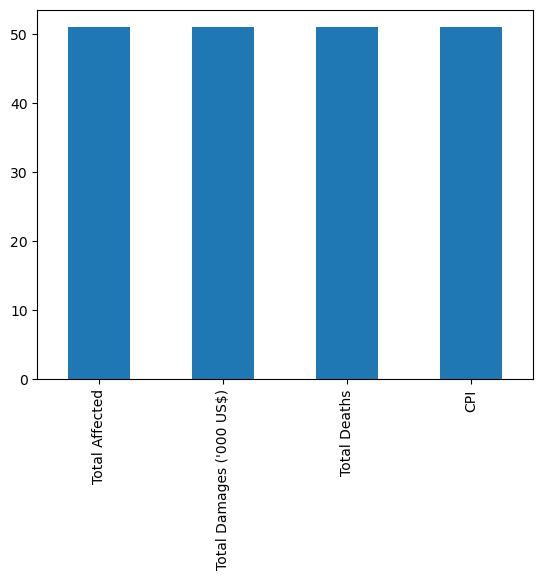

In [6]:
# Drop rows with NaN or inf values
average_data_cleaned = average_data.dropna()
average_data_cleaned.count().plot.bar()

Correlation Coefficient: 0.6231346086180216


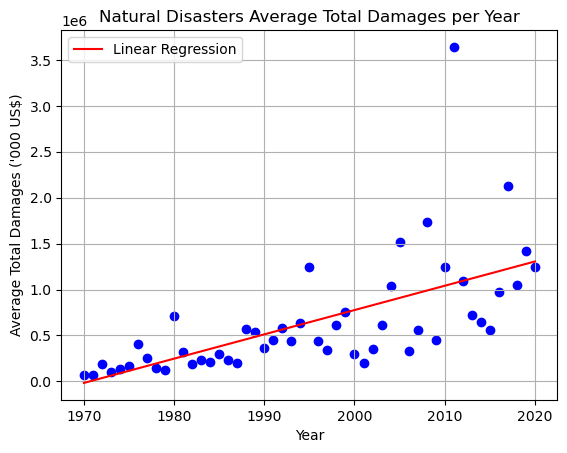

In [7]:
# Extract 'Total Affected' and 'Total Damages' data
average_total_affected = average_data_cleaned['Total Affected']
average_total_damages = average_data_cleaned['Total Damages (\'000 US$)']

# Create scatter plot using 'Year' as x-axis and 'Average Total Damages (\'000 US$)' as y-axis
plt.scatter(average_data_cleaned.index, average_total_damages, marker='o', color='b')

# Calculate correlation coefficient between 'Year' and 'Average Total Damages (\'000 US$)'
correlation_coefficient = st.pearsonr(average_data_cleaned.index, average_total_damages)[0]
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_data_cleaned.index, average_total_damages)

# Generate predictions using the linear regression model
predicted_average_total_damages = slope * average_data_cleaned.index + intercept

# Plot linear regression line
plt.plot(average_data_cleaned.index, predicted_average_total_damages, color='r', label='Linear Regression')

# Set title, label, legend, and add grid
plt.title('Natural Disasters Average Total Damages per Year')
plt.xlabel('Year')
plt.ylabel('Average Total Damages (\'000 US$)')
plt.legend()
plt.grid()

# Save the plot to a file
plt.savefig('Natural_Disasters_Average_Total_Damages_per_Year.png', format='png')

# Display scatter plot
plt.show()

Correlation Coefficient: -0.45425783007320775


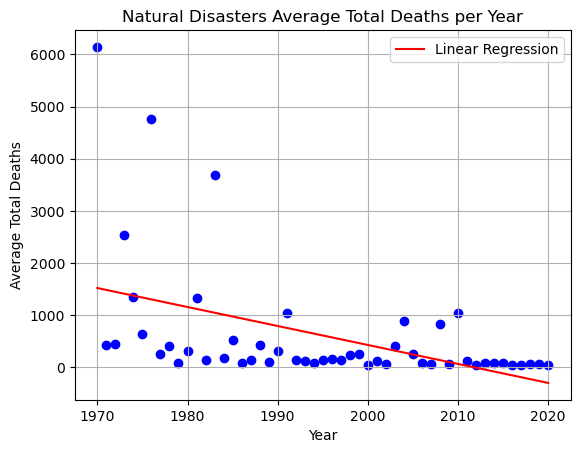

In [8]:
# Extract 'Total Affected' and 'Total Damages' data
average_total_affected = average_data_cleaned['Total Affected']
average_total_deaths = average_data_cleaned['Total Deaths']

# Create scatter plot using 'Year' as x-axis and 'Average Total Deaths' as y-axis
plt.scatter(average_data_cleaned.index, average_total_deaths, marker='o', color='b')

# Calculate correlation coefficient between 'Year' and 'Average Total Deaths'
correlation_coefficient = st.pearsonr(average_data_cleaned.index, average_total_deaths)[0]
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_data_cleaned.index, average_total_deaths)

# Generate predictions using the linear regression model
predicted_average_total_deaths = slope * average_data_cleaned.index + intercept

# Plot linear regression line
plt.plot(average_data_cleaned.index, predicted_average_total_deaths, color='r', label='Linear Regression')

# Set title, label, legend, and add grid
plt.title('Natural Disasters Average Total Deaths per Year')
plt.xlabel('Year')
plt.ylabel('Average Total Deaths')
plt.legend()
plt.grid()

# Save the plot to a file
plt.savefig('Natural_Disasters_Average_Total_Deaths_per_Year.png', format='png')

# Display scatter plot
plt.show()

Correlation Coefficient: 0.6237903972903875


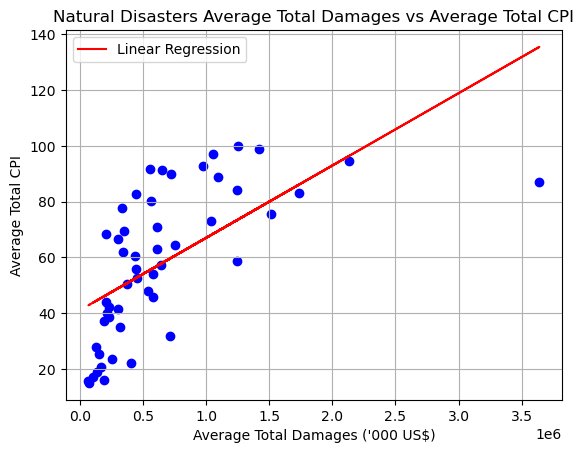

In [9]:
# Extract 'Total Affected' and 'Total Damages' data
average_total_damages = average_data_cleaned['Total Damages (\'000 US$)']
average_total_CPI = average_data_cleaned['CPI']

# Create scatter plot using 'Average Total Damages (\'000 US$)' as x-axis and 'Average Total CPI' as y-axis
plt.scatter(average_total_damages, average_total_CPI, marker='o', color='b')

# Calculate correlation coefficient between 'Average Total Damages (\'000 US$)' and 'Average Total CPI'
correlation_coefficient = st.pearsonr(average_total_damages, average_total_CPI)[0]
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_total_damages, average_total_CPI)

# Generate predictions using the linear regression model
predicted_average_total_CPI = slope * average_total_damages + intercept

# Plot linear regression line
plt.plot(average_total_damages, predicted_average_total_CPI, color='r', label='Linear Regression')

# Set title, label, legend, and add grid
plt.title('Natural Disasters Average Total Damages vs Average Total CPI')
plt.xlabel('Average Total Damages (\'000 US$)')
plt.ylabel('Average Total CPI')
plt.legend()
plt.grid()

# Save the plot to a file
plt.savefig('Natural_Disasters_Average_Total_Damage_vs_Average_Total_CPI.png', format='png')

# Display scatter plot
plt.show()

Correlation Coefficient: -0.29844114669750843


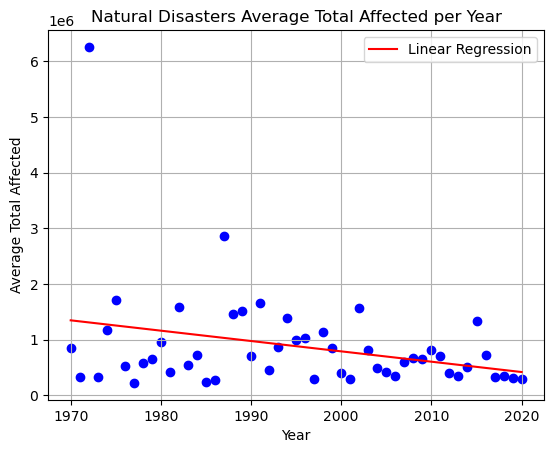

In [10]:
# Drop rows with NaN or inf values
average_data_cleaned = average_data.dropna()

# Extract 'Total Affected' and 'Total Damages' data
average_total_affected = average_data_cleaned['Total Affected']
average_total_damages = average_data_cleaned['Total Damages (\'000 US$)']

# Create scatter plot using 'Year' as x-axis and 'Average Total Affected' as y-axis
plt.scatter(average_data_cleaned.index, average_total_affected, marker='o', color='b')

# Calculate correlation coefficient between 'Year' and 'Average Total Affected'
correlation_coefficient = st.pearsonr(average_data_cleaned.index, average_total_affected)[0]
print("Correlation Coefficient:", correlation_coefficient)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = st.linregress(average_data_cleaned.index, average_total_affected)

# Generate predictions using the linear regression model
predicted_average_total_affected = slope * average_data_cleaned.index + intercept

# Plot linear regression line
plt.plot(average_data_cleaned.index, predicted_average_total_affected, color='r', label='Linear Regression')

# Set title, label, legend, and add grid
plt.title('Natural Disasters Average Total Affected per Year')
plt.xlabel('Year')
plt.ylabel('Average Total Affected')
plt.legend()
plt.grid()

# Save the plot to a file
plt.savefig('Natural_Disasters_Average_Total_Affected_per_year.png', format='png')

# Display scatter plot
plt.show()

In [11]:
# Group by 'Continent' and calculate the size of each group
grouped_continent_sizes = specific_df.groupby(['Continent']).size().reset_index(name='Count')
grouped_continent_sizes

,Continent,Count
0,Africa,2812
1,Americas,3519
2,Asia,5793
3,Europe,1858
4,Oceania,662


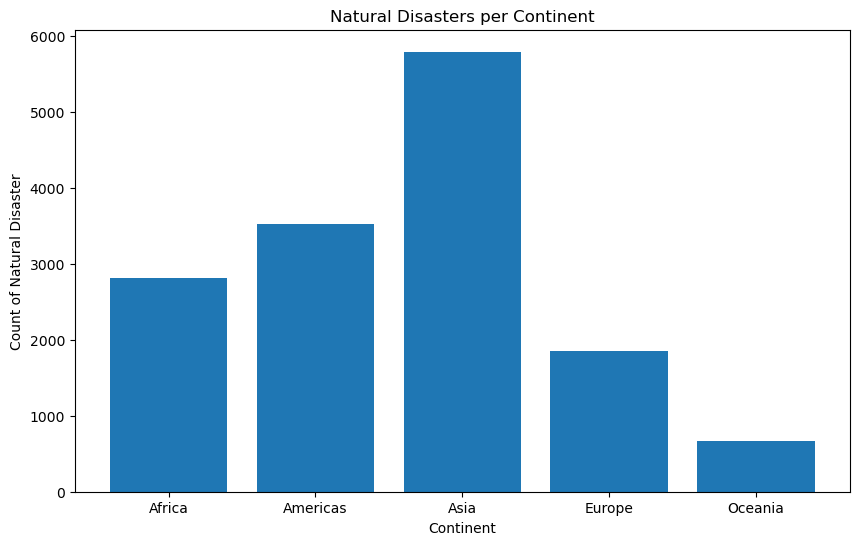

In [12]:
# Create a bar chart using the count data
plt.figure(figsize=(10, 6))
plt.bar(grouped_continent_sizes['Continent'], grouped_continent_sizes['Count'])

# Set the labels and title
plt.xlabel('Continent')
plt.ylabel('Count of Natural Disaster')
plt.title('Natural Disasters per Continent')

# Save the plot to a file
plt.savefig('Natural_disasters_per_continent.png', format='png')

# Show the plot
plt.show()

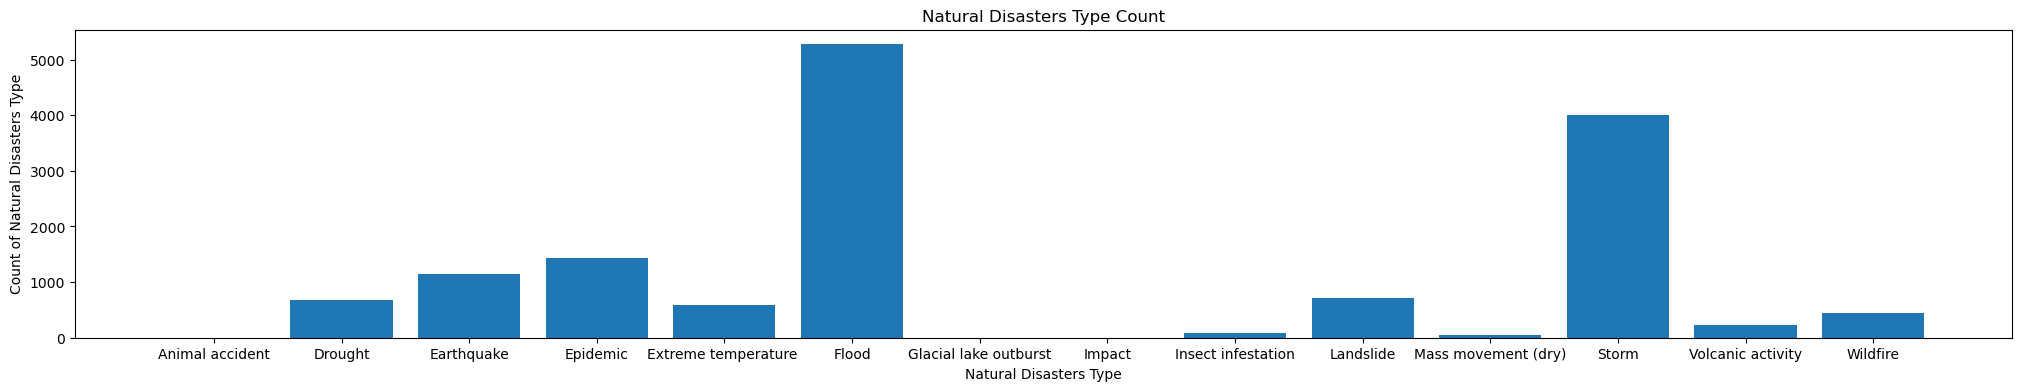

In [16]:
# Group by 'Disaster Type' and calculate the size of each group
grouped_disaster_type_sizes = specific_df.groupby(['Disaster Type']).size().reset_index(name='Count')
grouped_disaster_type_sizes

# Create a bar chart using the count data
plt.figure(figsize=(25, 4))
plt.bar(grouped_disaster_type_sizes['Disaster Type'], grouped_disaster_type_sizes['Count'])


# Set the labels, title, and make x-axis labels to be horizontal
plt.xlabel('Natural Disasters Type')
plt.ylabel('Count of Natural Disasters Type')
plt.title('Natural Disasters Type Count')


# Save the plot to a file
plt.savefig('Disaster_type_count.png', format='png')

# Show the plot
plt.show()

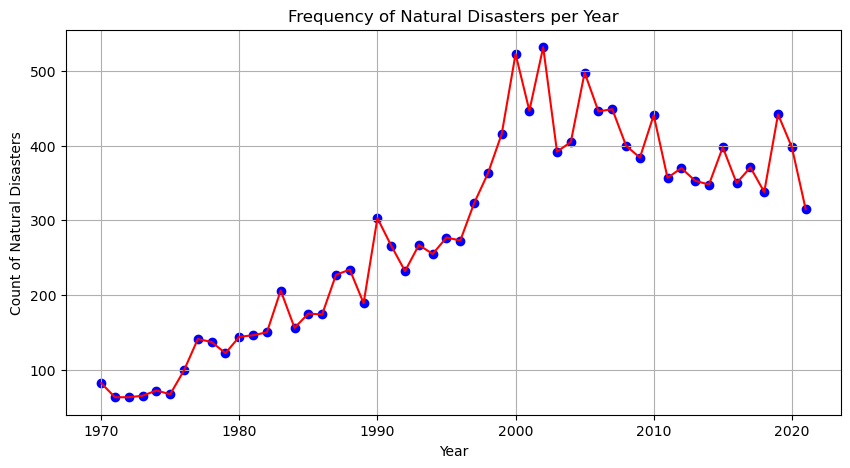

In [14]:
# Group by 'Year' and calculate the size of each group
grouped_year_sizes = specific_df.groupby(['Year']).size().reset_index(name='Count')
grouped_year_sizes

# Create a Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(grouped_year_sizes['Year'], grouped_year_sizes['Count'], marker='o', color='b')

# Add a line to the scatter plot
plt.plot(grouped_year_sizes['Year'], grouped_year_sizes['Count'], color='r', linestyle='-')

# Set title, label, and add grid
plt.title('Frequency of Natural Disasters per Year')
plt.xlabel('Year')
plt.ylabel('Count of Natural Disasters')
plt.grid()

# Save the plot to a file
plt.savefig('number_of_disasters_year.png', format='png')

# Show the plot
plt.show()

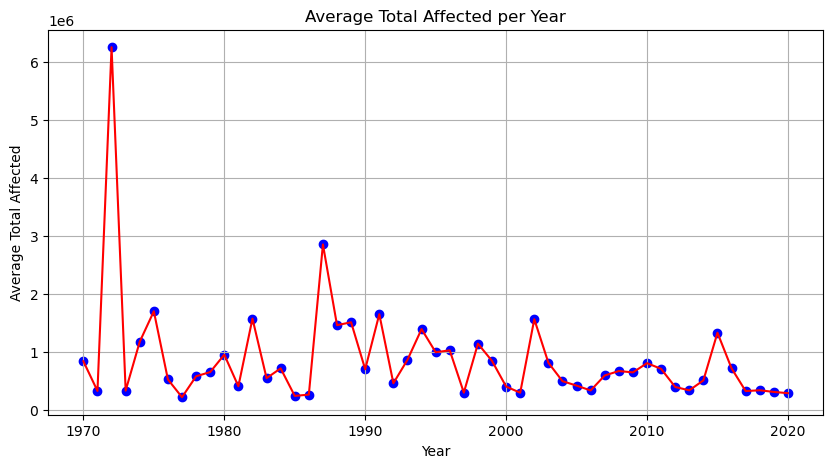

In [15]:
# Create a Scatter plot
plt.figure(figsize=(10, 5))
plt.scatter(average_data_cleaned.index, average_data_cleaned['Total Affected'], marker='o', color='b')

# Add a line to the scatter plot
plt.plot(average_data_cleaned.index, average_data_cleaned['Total Affected'], color='r', linestyle='-')

# Set title, label, and add grid
plt.title('Average Total Affected per Year')
plt.xlabel('Year')
plt.ylabel('Average Total Affected')
plt.grid()

# Save the plot to a file
plt.savefig('average_total_affected_by_year.png', format='png')

# Show the plot
plt.show()